In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 

In [3]:
data=pd.read_csv('TrainingDiab.csv').dropna(axis=1)
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
#checking for data set is balanced or not
disease_count=data['prognosis'].value_counts()
temp_df=pd.DataFrame({
    "Disease": disease_count.index,
    "Counts":disease_count.values
})

In [5]:
temp_df

,Disease,Counts
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120
5,Common Cold,120
6,Pneumonia,120
7,Dimorphic hemmorhoids(piles),120
8,Heart attack,120
9,Varicose veins,120


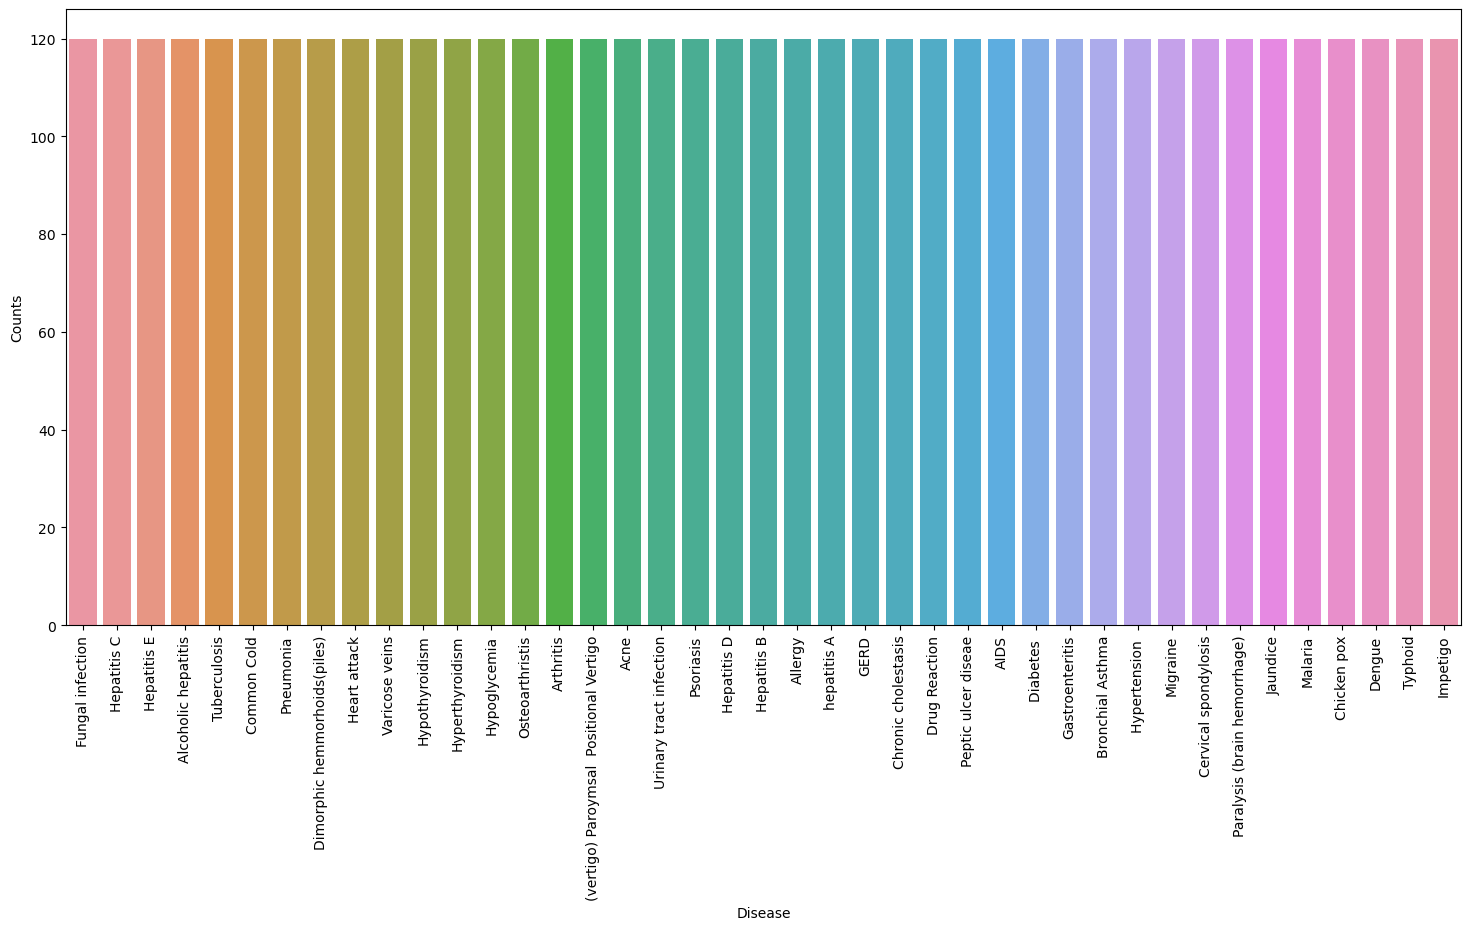

In [6]:
plt.figure(figsize=(18,8))
sns.barplot(x='Disease',y='Counts', data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [7]:
# Label encoding on prognosis
encoder=LabelEncoder()
data['prognosis']=encoder.fit_transform(data['prognosis'])

In [8]:
X = data.iloc[:,:-1] 
y = data.iloc[:, -1] 
X_train, X_test, y_train, y_test =train_test_split( 
  X, y, test_size = 0.2, random_state = 24) 
  
print(f"Train: {X_train.shape}, {y_train.shape}") 
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


# Model Building

In [9]:
#scoring metrics for kfold validation
def cv_score(estimator,X,y):
    return accuracy_score(y,estimator.predict(X))
models={
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

In [10]:
for model_name in models:
    model=models[model_name]
    scores=cross_val_score(model,X,y,cv=10,n_jobs=-1,scoring=cv_score)
    
    print("=="*15)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


# Building robust classifier by combining all models: 

Accuracy on train data by SVM Classifier\ : 100.0
Accuracy on test data by SVM Classifier\ : 100.0


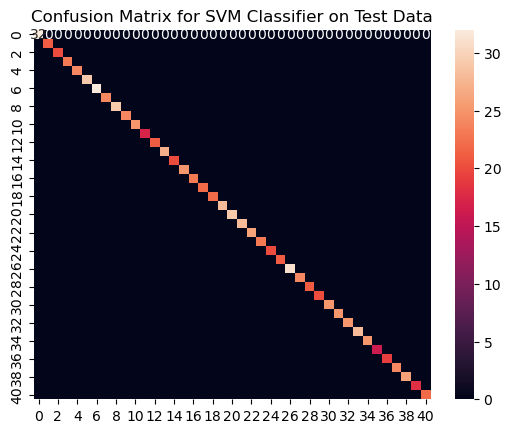

In [11]:
svm_model=SVC()
svm_model.fit(X_train,y_train)
preds=svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\ : {accuracy_score(y_train, svm_model.predict(X_train))*100}") 

print(f"Accuracy on test data by SVM Classifier\ : {accuracy_score(y_test, preds)*100}") 

cf_matrix=confusion_matrix(y_test,preds)
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data") 
plt.show() 

Accuracy on train data by Naibe Biase Classifier\ : 100.0
Accuracy on test data by Naibe Biase Classifier\ : 100.0


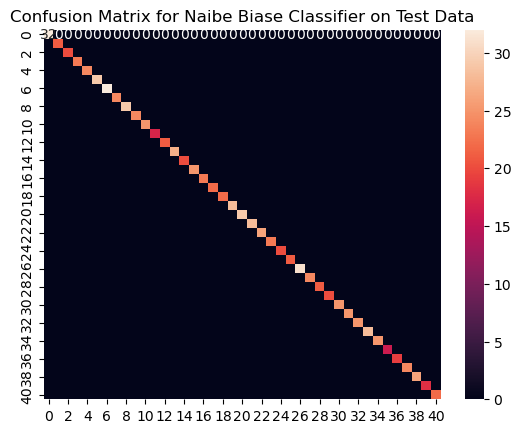

In [12]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
preds=nb_model.predict(X_test)

print(f"Accuracy on train data by Naibe Biase Classifier\ : {accuracy_score(y_train, nb_model.predict(X_train))*100}") 

print(f"Accuracy on test data by Naibe Biase Classifier\ : {accuracy_score(y_test, preds)*100}") 

cf_matrix=confusion_matrix(y_test,preds)
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for Naibe Biase Classifier on Test Data") 
plt.show() 

Accuracy on train data by Random Forest Classifier\ : 100.0
Accuracy on test data by Random Forest Classifier\ : 100.0


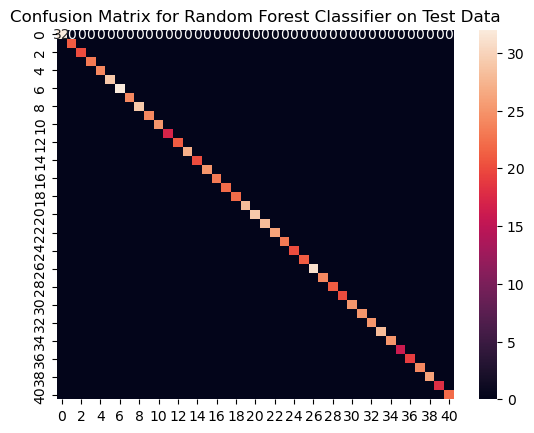

In [13]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
preds=rf_model.predict(X_test)

print(f"Accuracy on train data by Random Forest Classifier\ : {accuracy_score(y_train, rf_model.predict(X_train))*100}") 

print(f"Accuracy on test data by Random Forest Classifier\ : {accuracy_score(y_test, preds)*100}") 

cf_matrix=confusion_matrix(y_test,preds)
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data") 
plt.show() 

# Fitting the data on whole data and testing

In [14]:
#Loading the test data
test_data=pd.read_csv('TestingDiab.csv').dropna(axis=1)
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [15]:
test_X=test_data.iloc[:, :-1]
test_Y=encoder.transform(test_data.iloc[:,-1])

In [17]:
final_svm_model=SVC()
final_nb_model=GaussianNB()
final_rf_model=RandomForestClassifier(random_state=18)

final_svm_model.fit(X,y)
final_nb_model.fit(X,y)
final_rf_model.fit(X,y)

RandomForestClassifier(random_state=18)

In [19]:
svm_pred=final_svm_model.predict(test_X)
nb_pred=final_nb_model.predict(test_X)
rf_pred=final_rf_model.predict(test_X)

In [22]:
from scipy.stats import mode

In [23]:
final_pred=[mode([i,j,k])[0][0] for i,j,k in zip(svm_pred,nb_pred,rf_pred)]

C:\Users\hpw\AppData\Local\Temp\ipykernel_5932\350239843.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_pred=[mode([i,j,k])[0][0] for i,j,k in zip(svm_pred,nb_pred,rf_pred)]


Accuracy on Test dataset by the combined model\ : 100.0


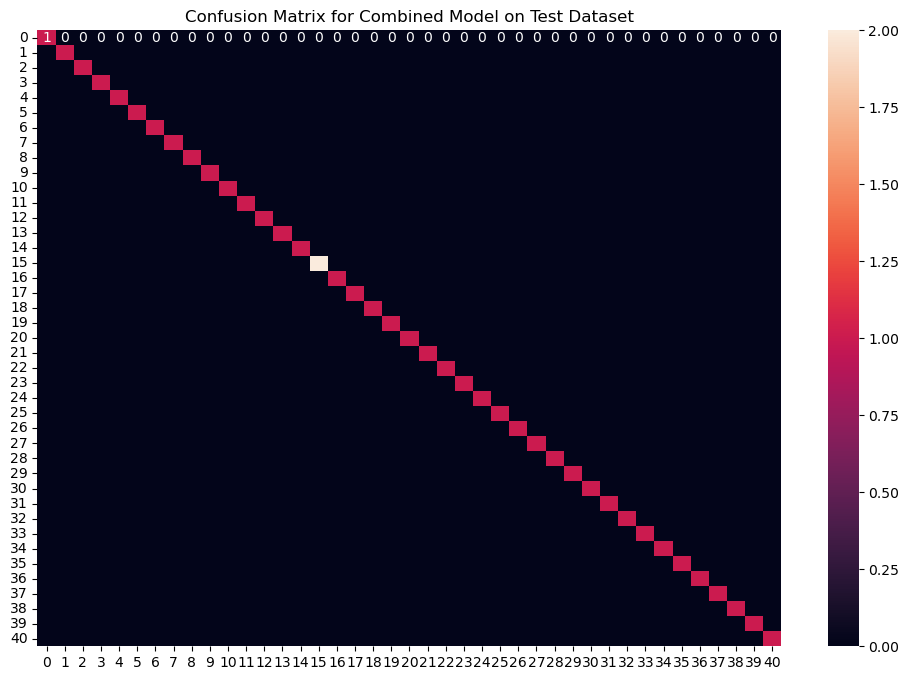

In [27]:
print(f"Accuracy on Test dataset by the combined model\ : {accuracy_score(test_Y, final_pred)*100}")
cf_matrix=confusion_matrix(test_Y,final_pred)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset") 
plt.show()

# Creating a function that can take symptoms as input and generate predictions for disease 

In [34]:
symptoms=X.columns.values
symptom_index={}

for index,value in enumerate(symptoms):
    symptom=" ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom]=index

In [35]:
data_dict = { 
    "symptom_index":symptom_index, 
    "predictions_classes":encoder.classes_
} 

In [42]:
def predictDisease(symptoms):
    symptoms=symptoms.split(",")
    
    input_data=[0]*len(data_dict["symptom_index"])
    for symptom in symptoms:
        index=data_dict["symptom_index"][symptom]
        input_data[index]=1
    #reshaping the input data into 2D array
    input_data=np.array(input_data).reshape(1,-1)    
    #generating individual output
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]] 
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]] 
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    #making final prediction
    final_prediction=mode([rf_prediction,nb_prediction,svm_prediction])
    predictions={
         "rf_model_prediction": rf_prediction, 
        "naive_bayes_prediction": nb_prediction, 
        "svm_model_prediction": svm_prediction, 
        "final_prediction":final_prediction 
    }
    return predictions

In [43]:
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': ModeResult(mode=array(['Fungal infection'], dtype='<U16'), count=array([3]))}


C:\Users\hpw\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\hpw\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\hpw\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\hpw\AppData\Local\Temp\ipykernel_5932\1822090112.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warni

In [44]:
print(predictDisease("Continuous Sneezing,Joint Pain,Chills"))

{'rf_model_prediction': 'Allergy', 'naive_bayes_prediction': 'Allergy', 'svm_model_prediction': 'Allergy', 'final_prediction': ModeResult(mode=array(['Allergy'], dtype='<U7'), count=array([3]))}


C:\Users\hpw\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\hpw\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\hpw\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\hpw\AppData\Local\Temp\ipykernel_5932\1822090112.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warni